# Dataset & Modelling Project Optimistic Team

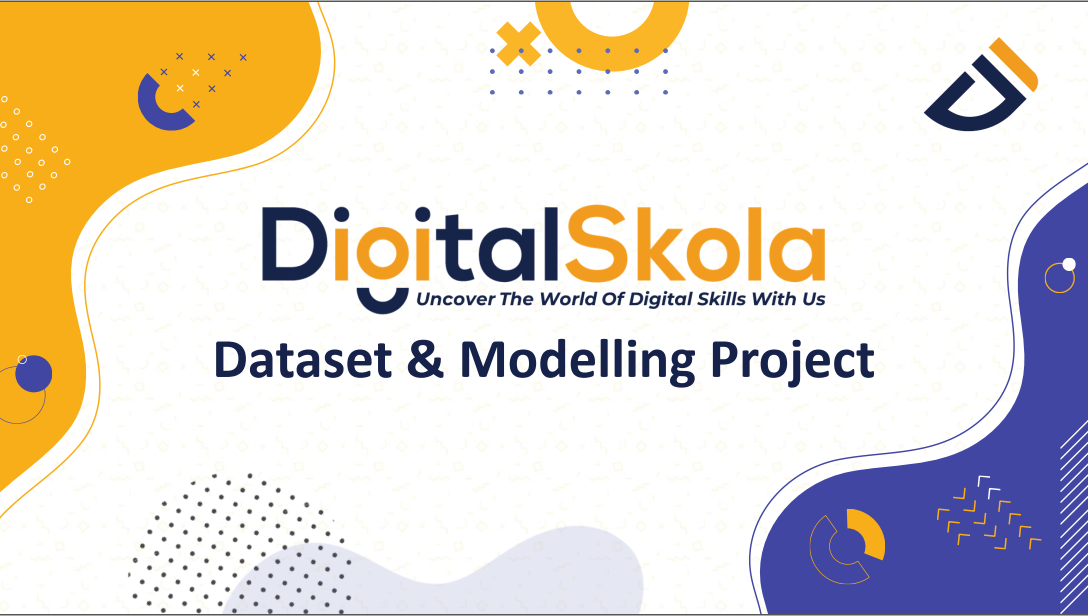

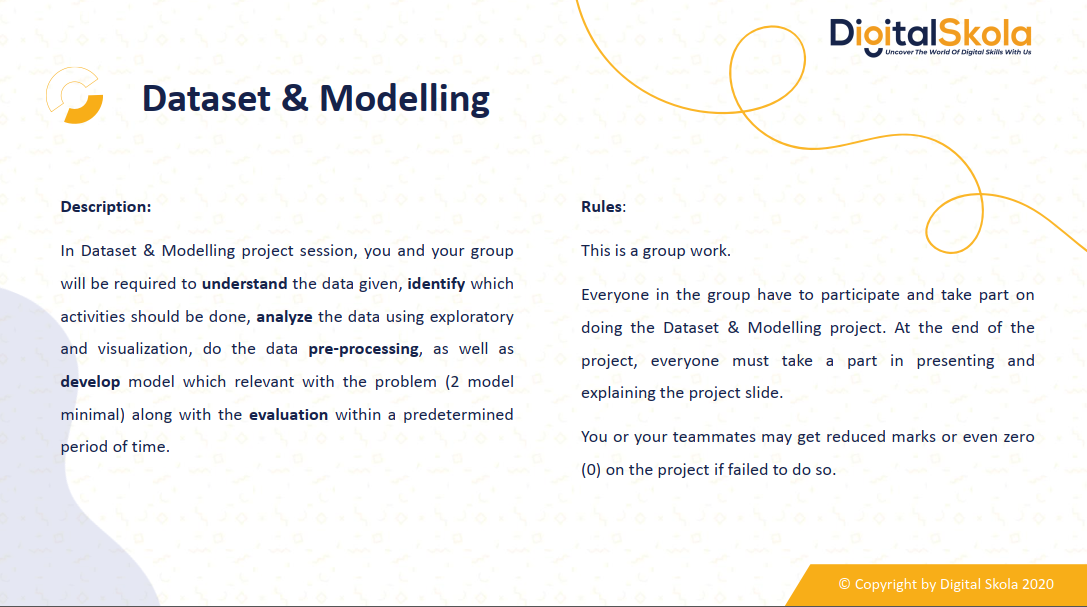

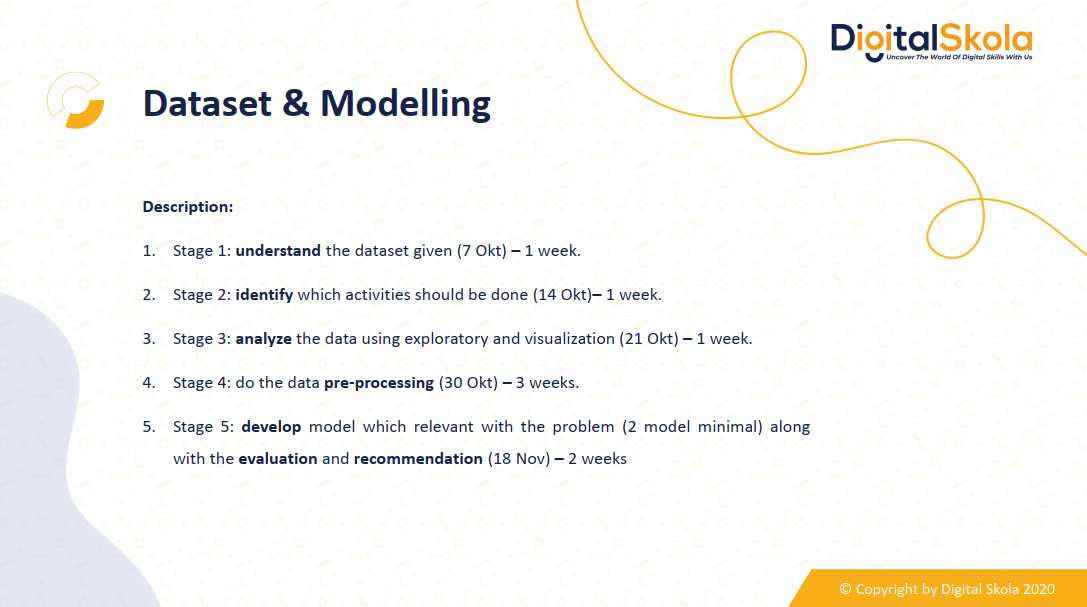

# Data Understanding

## Data Summary

Dataset banking ini adalah dataset yang berisikan data data nasabah yang memakai jasa bank. Di dalam dataset ini memiliki kolom yang saling berkaitan dan nilai yang bervariasi. Dataset banking ini menyediakan data yang nantinya akan dijawab kenapa nasabah bank keluar dari bank. Maka akan dilakukan churn prediction agar mengetahui apa yang menyebabkan nasabah keluar.

1.	Kolom 1: Row Number
Untuk mengetahui banyaknya baris data dan tidak memiliki makna apapun dalam pemrosesan data hingga outputnya.
2.	Kolom 2: Customer Id
Merupakan nomor pelanggan yang tercatat pada bank dan tidak memiliki makna apapun dalam keputusan pelanggan untuk meninggalkan bank.
3.	Kolom 3: surname
Berisi nama belakang dari pelanggan dan tidak memiliki makna apapun dalam keputusan pelanggan untuk meninggalkan bank.
4.	Kolom 4: Credit Score
Berisi nilai yang menggambarkan kelayakan pelanggan dalam menerima kredit. Credit score memiliki efek kepada pelanggan untuk meninggalkan bank atau tidak (pelanggan yang memiliki nilai tinggi berpotensi untuk meninggalkan bank).
5.	Kolom 5: Geography
Berisi lokasi pelanggan yang berpengaruh kepada keputusan mereka untuk meninggalkan bank.
6.	Kolom 6: Gender
Berisi jenis kelamin dari masing-masing pelanggan. Untuk mengetahui gender apa  yang lebih berpotensi meninggalkan bank.
7.	Kolom 7: Age
Berisi data umur dari setiap pelanggan. Merupakan data yang relevan karena pelanggan yang lebih tua cenderung berpotensi untuk meninggalkan bank daripada pelanggan yang lebih muda.
8.	Kolom 8: Tenure
Merupakan data seberapa lama pelanggan menjadi klien pada bank. Biasanya, pelanggan yang sudah lama menjadi klien akan setia dan kecil kemungkinannya untuk meninggalkan bank.
9.	Kolom 9: Balance
Merupakan data yang menjadi indikator sangat baik dari customer churn. Pelanggan dengan saldo yang lebih tinggi di akunnya akan cenderung tidak akan meninggalkan bank jika dibandingkan dengan pelanggan yang saldonya lebih rendah.
10.	Kolom 10: Number of Products
Mengacu pada jumlah produk yang telah dibeli oleh pelanggan melalui bank.
11.	Kolom 11: Has Credit Card
Menujukkan pelanggan mana yang memiliki kartu kredit dan yang tidak. Data ini relevan karena pelanggan yang memiliki kartu kredit kecil kemungkinannya untuk meninggalkan bank.
12.	Kolom 12: Is Active Number
Pelanggan yang aktif kecil kemungkinannya untuk meninggalkan bank.
13.	Kolom 13: Estimated Salary
Sama seperti saldo, pelanggan yang memiliki gaji rendah akan cenderung meninggalkan bank daripada yang bergaji tinggi.
14.	Kolom 14: Exited
Menunjukkan pelanggan meninggalkan bank atau tidak.


## Library

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

## Read Dataset

In [4]:
data = pd.read_csv('Dataset_9 - Banking.csv')

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Shape

In [7]:
data.shape

(10000, 14)

# Identify Data

## Statistical Descriptive

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [9]:
data.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


## Column Unique Value

In [10]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [11]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [13]:
data.Tenure.unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [14]:
data.NumOfProducts.unique()

array([1, 3, 2, 4], dtype=int64)

In [15]:
data.HasCrCard.unique()

array([1, 0], dtype=int64)

In [16]:
data.IsActiveMember.unique()

array([1, 0], dtype=int64)

In [17]:
data.Exited.unique()

array([1, 0], dtype=int64)

## Missing Value & Duplicate

In [18]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
data.duplicated().sum()

0

## Correlation

In [20]:
corr = data.corr()

In [21]:
corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


# Exploratory Data Analysis

## Feature info

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Delete some Feature

In [23]:
df = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Visualization

### Percent of churn

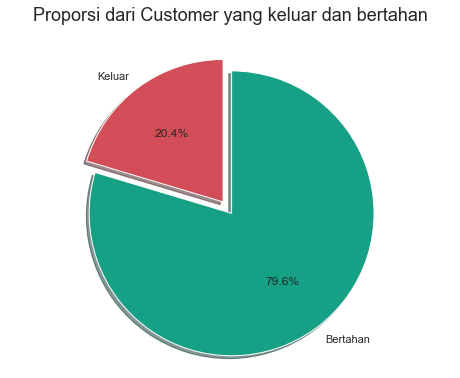

In [25]:
labels = 'Keluar', 'Bertahan'
sizes = [
    df.Exited[df['Exited'] == 1].count(), df.Exited[df['Exited'] == 0].count()
]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
colors = ['#D24D57', '#16A085']
ax1.pie(sizes,
        explode=explode,
        labels=labels,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90,
        colors=colors)
ax1.axis('equal')
plt.title("Proporsi dari Customer yang keluar dan bertahan",
          size=18,
          y=1.0,
          pad=24)
plt.show()

### Continuous variable distribution

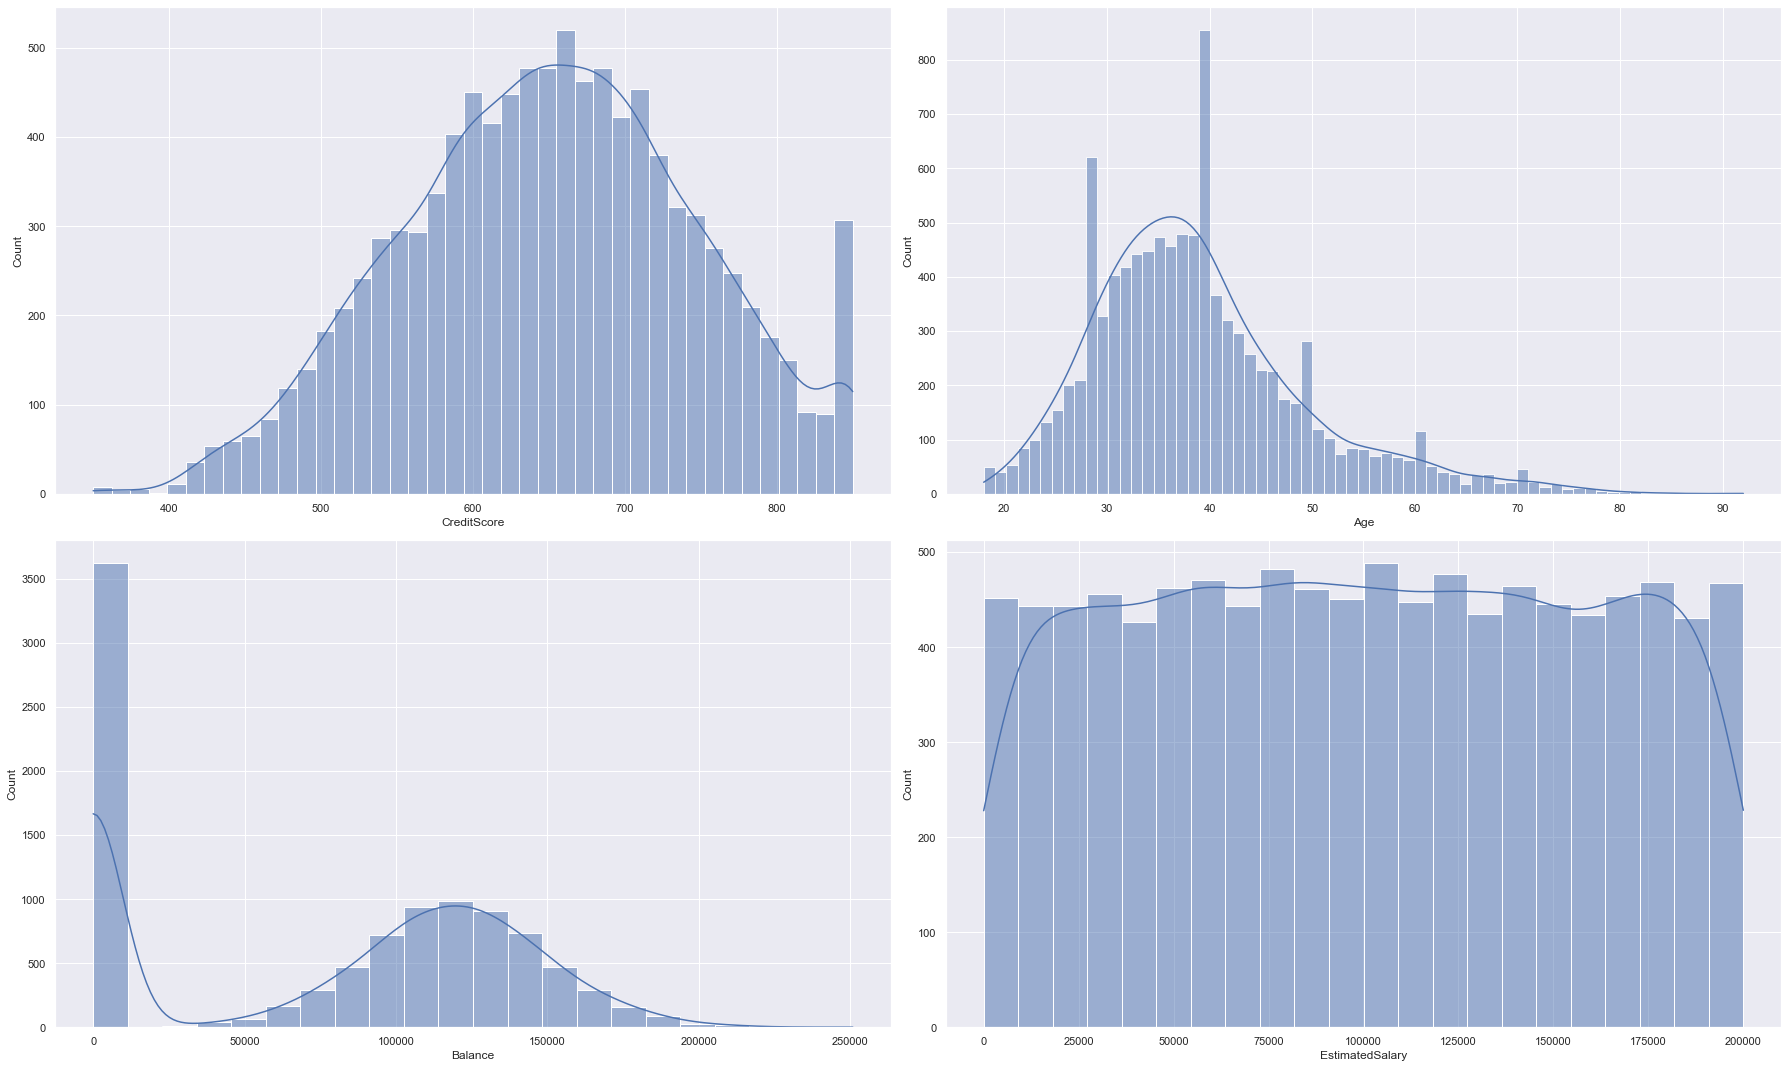

In [26]:
# Distribusi variabel continue
sns.set(rc={'figure.figsize': (25, 15)})
fig, axs = plt.subplots(2,2)
sns.color_palette("coolwarm")
sns.histplot(data=df, x="CreditScore", ax=axs[0, 0], kde=True)
sns.histplot(data=df, x="Age", ax=axs[0, 1], kde=True)
sns.histplot(data=df, x="Balance", ax=axs[1, 0], kde=True)
sns.histplot(data=df, x="EstimatedSalary", ax=axs[1, 1], kde=True);
plt.tight_layout()
plt.show()

### Categorical Variable

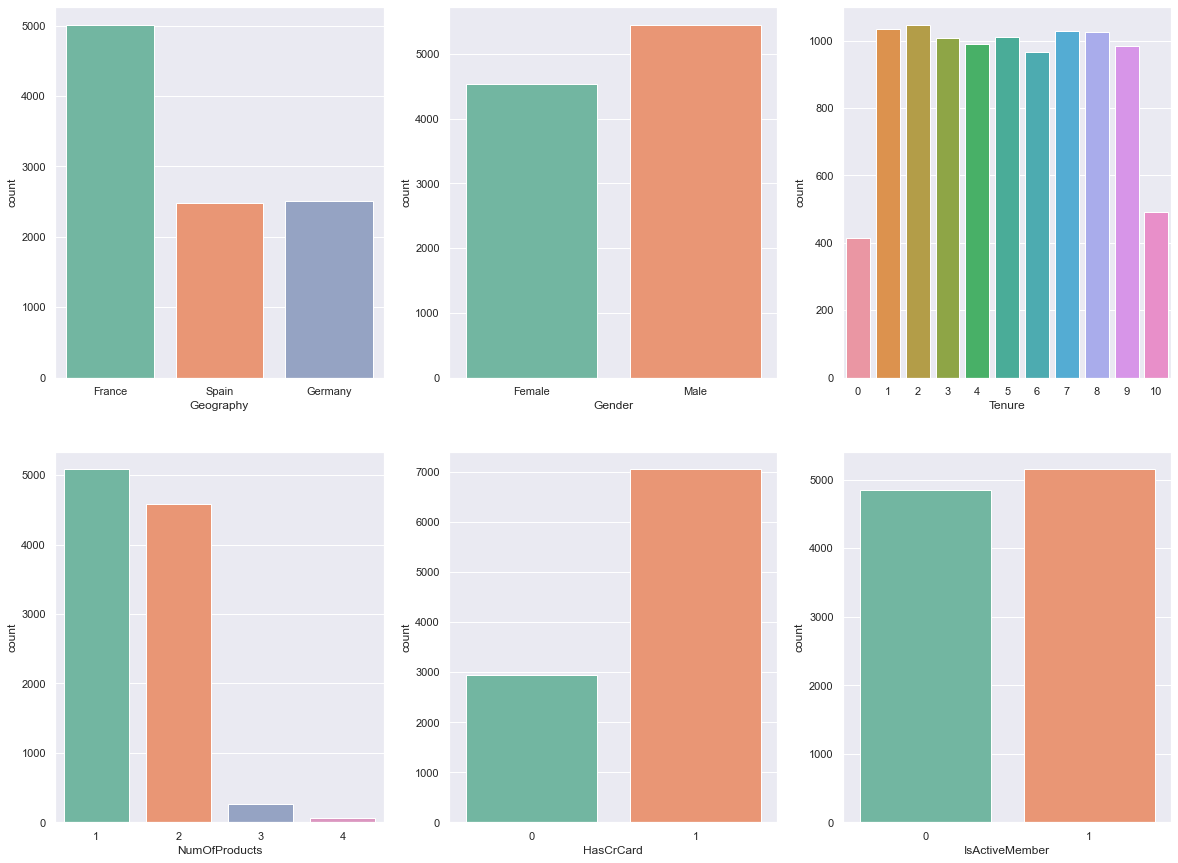

In [27]:
fig, axs = plt.subplots(2, 3, figsize=(20, 15))
sns.set_theme(palette="Set2")
sns.countplot(data=df, x='Geography', ax=axs[0, 0])
sns.countplot(data=df, x='Gender', ax=axs[0, 1])
sns.countplot(data=df, x='Tenure', ax=axs[0, 2])
sns.countplot(data=df, x='NumOfProducts', ax=axs[1, 0])
sns.countplot(data=df, x='HasCrCard', ax=axs[1, 1])
sns.countplot(data=df, x='IsActiveMember', ax=axs[1, 2]);
plt.show()

### Geography with Gender Exited

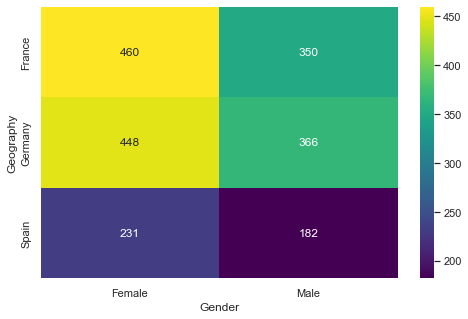

In [28]:
plt.figure(figsize=(8, 5))
crosstab = pd.crosstab(df['Geography'], df['Gender'], values=df['Exited'], aggfunc=np.sum)
sns.heatmap(crosstab, annot=True, fmt='d', cmap='viridis')
plt.show()

### Categorical Variable Vs Churn

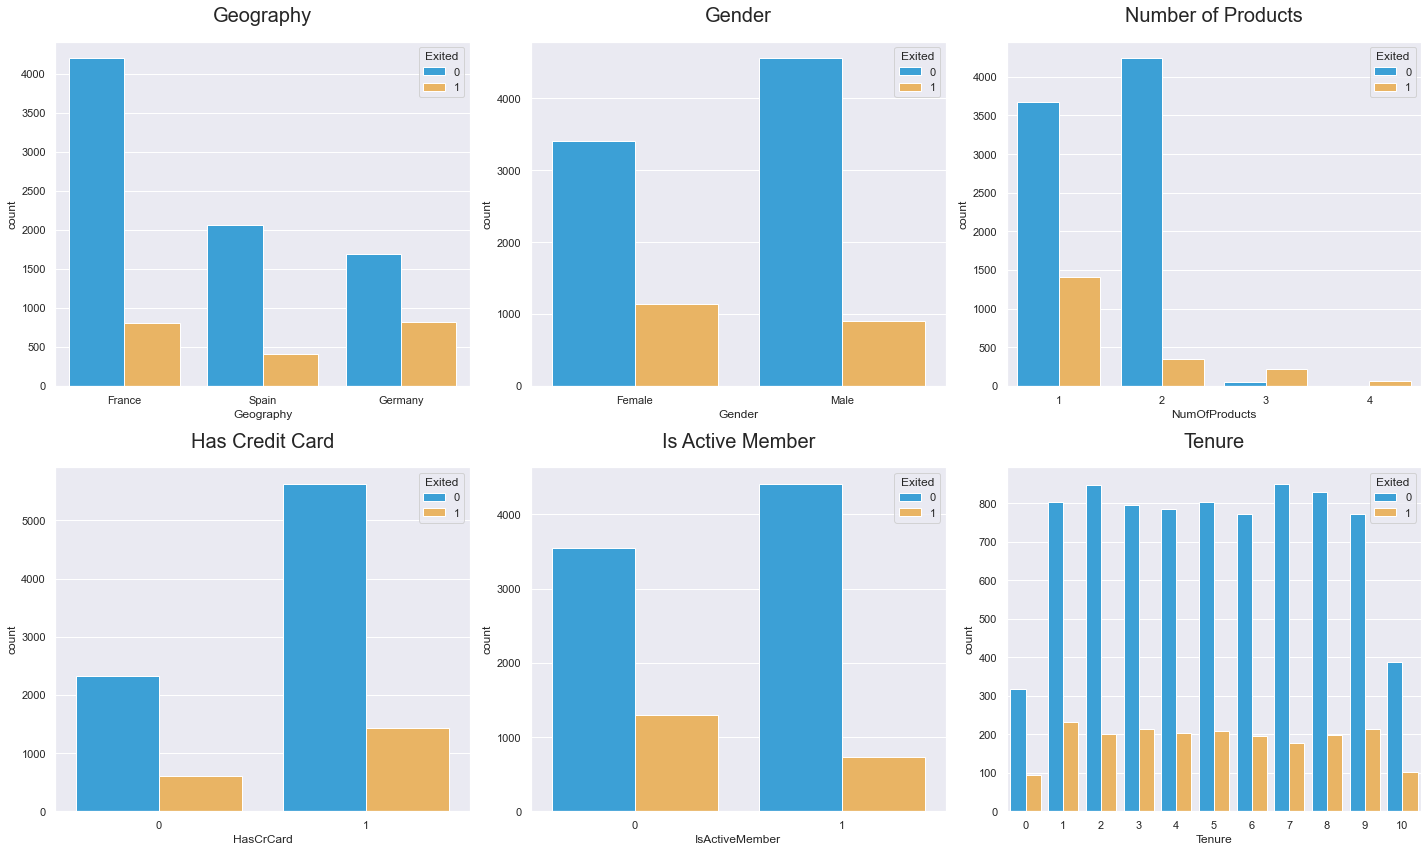

In [29]:
fig, ax = plt.subplots(2, 3, figsize=(20, 12))
colors = ['#D24D57', '#16A085']
sns.countplot(x='Geography',
              hue='Exited',
              data=df,
              palette=['#22A7F0', '#FFB94E'],
              ax=ax[0][0])
sns.countplot(x='Gender',
              hue='Exited',
              palette=['#22A7F0', '#FFB94E'],
              data=df,
              ax=ax[0][1])
sns.countplot(x='HasCrCard',
              hue='Exited',
              palette=['#22A7F0', '#FFB94E'],
              data=df,
              ax=ax[1][0])
sns.countplot(x='IsActiveMember',
              hue='Exited',
              palette=['#22A7F0', '#FFB94E'],
              data=df,
              ax=ax[1][1])
sns.countplot(x='Tenure',
              hue='Exited',
              palette=['#22A7F0', '#FFB94E'],
              data=df,
              ax=ax[1][2])
sns.countplot(x='NumOfProducts',
              hue='Exited',
              palette=['#22A7F0', '#FFB94E'],
              data=df,
              ax=ax[0][2])

ax[0][0].set_title("Geography", y=1.0, pad=20, size=20)
ax[0][1].set_title("Gender", y=1.0, pad=20, size=20)
ax[1][0].set_title("Has Credit Card", y=1.0, pad=20, size=20)
ax[1][1].set_title("Is Active Member", y=1.0, pad=20, size=20)
ax[1][2].set_title("Tenure", y=1.0, pad=20, size=20)
ax[0][2].set_title("Number of Products", y=1.0, pad=20, size=20)

fig.tight_layout()
plt.show()

### Boxplot

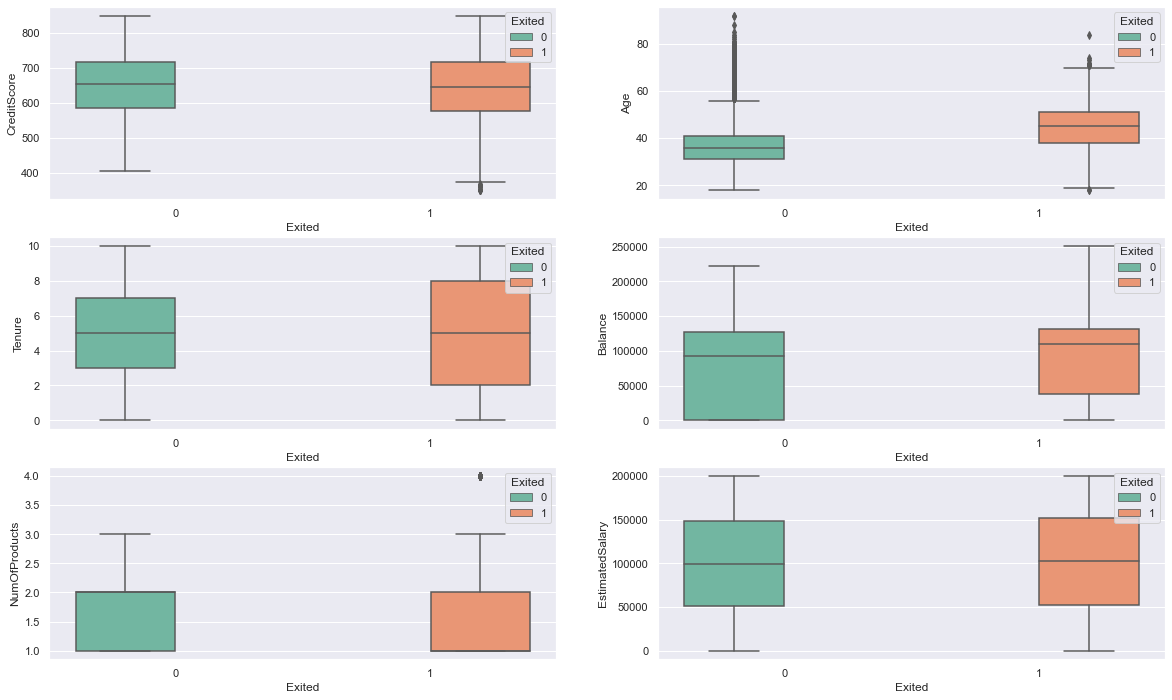

In [30]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12));
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=df, ax=axarr[0][0]);
sns.boxplot(y='Age', x='Exited', hue='Exited', data=df, ax=axarr[0][1]);
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=df, ax=axarr[1][0]);
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=df, ax=axarr[1][1]);
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=df, ax=axarr[2][0]);
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=df, ax=axarr[2][1]);

### Age with Segmentation

In [31]:
df_age = df.copy()

df_age['age_segmentation'] = np.where(
    df['Age'] <= 20, '1-20',
    np.where(
        df['Age'] <= 30, '21-30',
        np.where(
            df['Age'] <= 40, '31-40',
            np.where(
                df['Age'] <= 50, '41-50',
                np.where(
                    df['Age'] <= 60, '51-60',
                    np.where(df['Age'] <= 70, '61-70',
                             np.where(df['Age'] <= 80, '71-80', '90++')))))))

df_age.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_segmentation
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-50
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-50
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-50
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-40
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-50


In [32]:
df_age = df_age.groupby(['age_segmentation', 'Exited']).agg({
    'Gender': 'count'
}).reset_index()
df_age.columns = ['age_segmentation', 'Exited', 'user_count']
df_age['Exited'] = df_age['Exited'].apply(lambda x: 'Exited'
                                          if x == 1 else 'Retained')
df_age

,age_segmentation,Exited,user_count
0,1-20,Retained,84
1,1-20,Exited,5
2,21-30,Retained,1736
3,21-30,Exited,143
4,31-40,Retained,3913
5,31-40,Exited,538
6,41-50,Retained,1532
7,41-50,Exited,788
8,51-60,Retained,349
9,51-60,Exited,448


Text(0, 0.5, 'Total User')

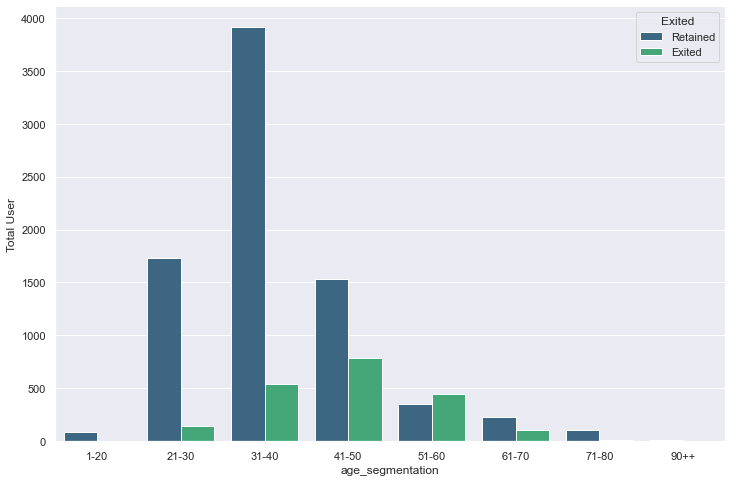

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_age,
            x='age_segmentation',
            y='user_count',
            hue='Exited',
            palette='viridis')
plt.ylabel('Total User')

In [34]:
data['Age_Grouping'] = pd.cut(x=df['Age'], 
                            bins=[18, 40, 60, 95], 
                            labels=['Young', 'Middle', 'Old'])

In [35]:
data.Age_Grouping.value_counts()

Young     6397
Middle    3117
Old        464
Name: Age_Grouping, dtype: int64

In [36]:
data['Exited'].groupby(data['Age_Grouping']).sum()

Age_Grouping
Young      684
Middle    1236
Old        115
Name: Exited, dtype: int64

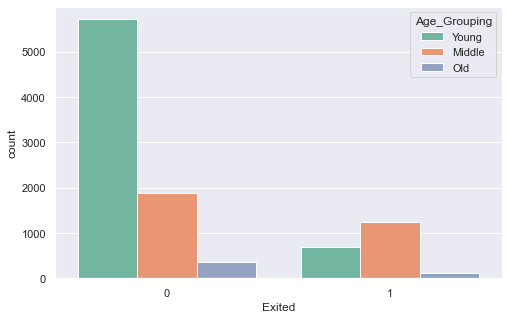

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', hue='Age_Grouping', data=data)
plt.show()

In [38]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Number of Product

In [39]:
df_product = df.groupby(['NumOfProducts', 'Exited']).agg({
    'Gender': 'count'
}).reset_index()

df_product.columns = ['NumOfProducts', 'Exited', 'user_count']

df_product['total_user'] = df_product.groupby(
    ['NumOfProducts'])['user_count'].transform('sum')

df_product['Percentage'] = round(
    df_product['user_count'] / df_product['total_user'] * 100, 2)
df_product['Percentage'] = df_product['Percentage'].astype(str)
df_product['Percentage'] = df_product['Percentage'] + '%'

df_product['Exited'] = df_product['Exited'].apply(lambda x: 'Exited'
                                                  if x == 1 else 'Retained')
df_product

,NumOfProducts,Exited,user_count,total_user,Percentage
0,1,Retained,3675,5084,72.29%
1,1,Exited,1409,5084,27.71%
2,2,Retained,4242,4590,92.42%
3,2,Exited,348,4590,7.58%
4,3,Retained,46,266,17.29%
5,3,Exited,220,266,82.71%
6,4,Exited,60,60,100.0%


Text(3.07, 160, '100.0%')

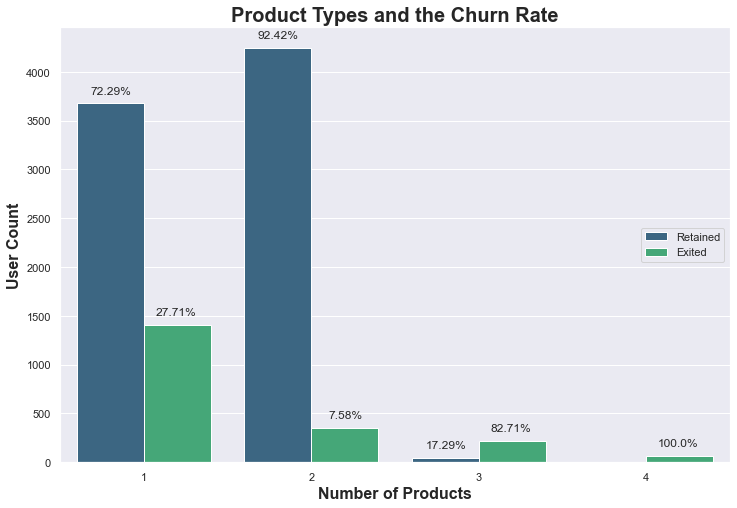

In [40]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_product,
            x='NumOfProducts',
            y='user_count',
            hue='Exited',
            palette='viridis')

plt.title('Product Types and the Churn Rate',
          loc='center',
          fontweight='bold',
          fontsize=20)

plt.xlabel('Number of Products', fontsize=16, fontdict={'weight': 'bold'})
plt.ylabel('User Count', fontsize=16, fontdict={'weight': 'bold'})

plt.legend(loc='center right')

plt.text(x=-0.32,
         y=df_product['user_count'][0] + 100,
         s=df_product['Percentage'][0],
         fontsize=12)
plt.text(x=0.07,
         y=df_product['user_count'][1] + 100,
         s=df_product['Percentage'][1],
         fontsize=12)
plt.text(x=0.68,
         y=df_product['user_count'][2] + 100,
         s=df_product['Percentage'][2],
         fontsize=12)
plt.text(x=1.1,
         y=df_product['user_count'][3] + 100,
         s=df_product['Percentage'][3],
         fontsize=12)
plt.text(x=1.68,
         y=df_product['user_count'][4] + 100,
         s=df_product['Percentage'][4],
         fontsize=12)
plt.text(x=2.07,
         y=df_product['user_count'][5] + 100,
         s=df_product['Percentage'][5],
         fontsize=12)
plt.text(x=3.07,
         y=df_product['user_count'][6] + 100,
         s=df_product['Percentage'][6],
         fontsize=12)

### Creditscore

In [41]:
df_credit = df.loc[:, ['CreditScore','Exited']]

labels = ["{0} - {1}".format(i, i + 99) for i in range(300, 800, 100)]
df_credit['Classification'] = pd.cut(df_credit.CreditScore, range(300, 900, 100), right=False, labels=labels)

df_credit = df_credit.groupby(['Exited','Classification']).agg({'CreditScore':'count'}).reset_index()
df_credit.columns = ['Exited','CreditScore','user_count']

df_credit['sum'] = df_credit.groupby('CreditScore')['user_count'].transform('sum')

df_credit['percentage'] = round(df_credit['user_count'] * 100 / df_credit['sum'],2)
df_credit['percentage'] = df_credit['percentage'].astype(str)
df_credit['percentage'] = df_credit['percentage'] + '%'

df_credit['Exited'] = df_credit['Exited'].apply(lambda x : 'Exited' if x == 1 else 'Retained')
df_credit.transpose()

,0,1,2,3,4,5,6,7,8,9
Exited,Retained,Retained,Retained,Retained,Retained,Exited,Exited,Exited,Exited,Exited
CreditScore,300 - 399,400 - 499,500 - 599,600 - 699,700 - 799,300 - 399,400 - 499,500 - 599,600 - 699,700 - 799
user_count,0,482,1892,3065,1997,19,131,510,753,496
sum,19,613,2402,3818,2493,19,613,2402,3818,2493
percentage,0.0%,78.63%,78.77%,80.28%,80.1%,100.0%,21.37%,21.23%,19.72%,19.9%


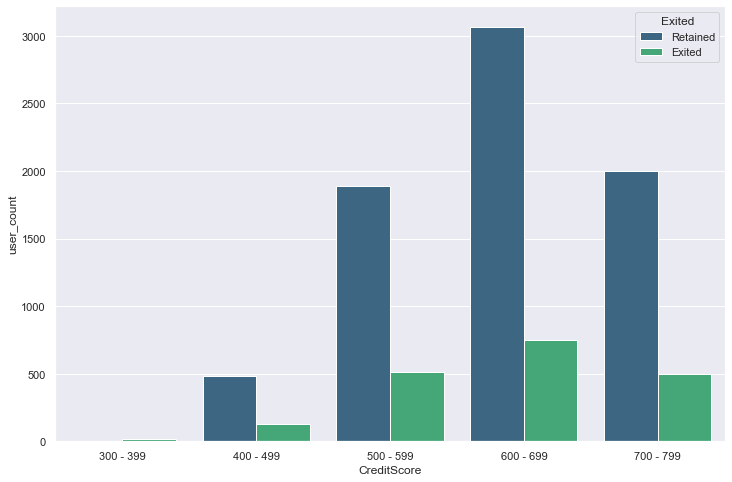

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(data = df_credit, x = 'CreditScore', y = 'user_count', hue='Exited', palette = 'viridis');

### relationship between columns

#### Exited vs IsActive

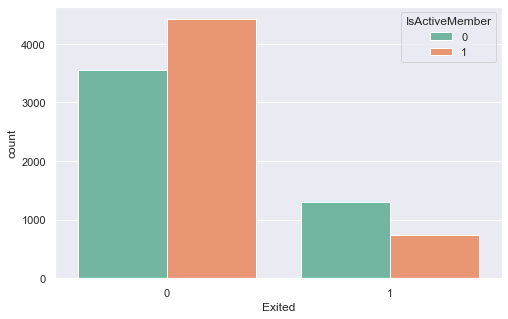

In [43]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', hue='IsActiveMember', data=df)
plt.show()

#### IsActive vs Gender

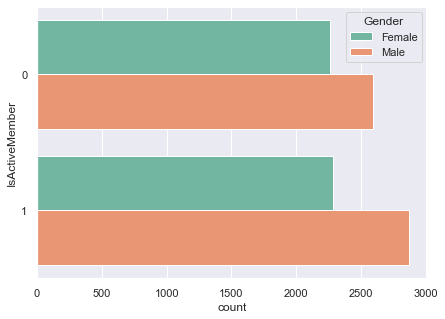

In [44]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, y='IsActiveMember', hue='Gender')
plt.show()

#### IsActive vs Geography

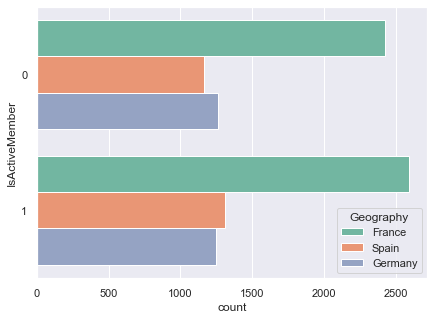

In [45]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, y='IsActiveMember', hue='Geography')
plt.show()

### Heatmap Correlation

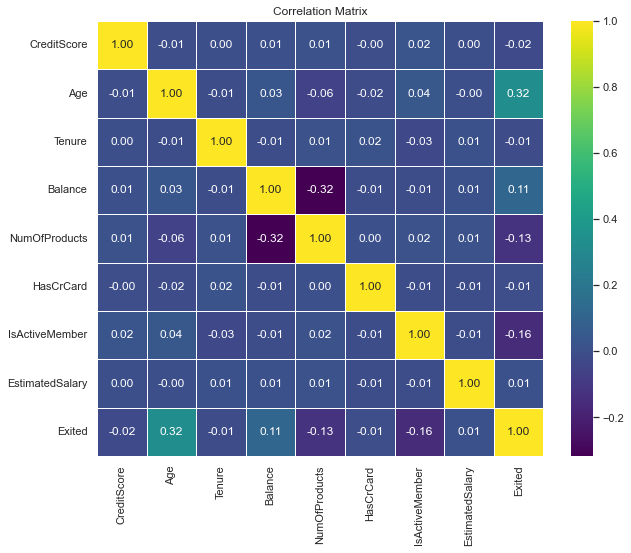

In [46]:
plt.figure(figsize = (10, 8))
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, annot=True, cmap='viridis', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

In [96]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression().fit(X_train, y_train)
y_pred_log_train = log.predict(X_train)
y_pred_log = log.predict(X_test)

In [97]:
classification_eval(y_train, y_pred_log_train, 'Logistic Regression')

Evaluation Model  : Logistic Regression
Confusion matrix  :
 [[5667 2296]
 [2418 5545]]
accuracy          : 0.704
precision         : 0.707
recall            : 0.696
f1                : 0.702


In [98]:
classification_eval(y_test, y_pred_log, 'Logistic Regression')

Evaluation Model  : Logistic Regression
Confusion matrix  :
 [[1160  447]
 [ 124  269]]
accuracy          : 0.715
precision         : 0.376
recall            : 0.684
f1                : 0.485
